In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
abbreviation_to_name = {
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#States.
    "AK": "Alaska",
    "AL": "Alabama",
    "AR": "Arkansas",
    "AZ": "Arizona",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "IA": "Iowa",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "MA": "Massachusetts",
    "MD": "Maryland",
    "ME": "Maine",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MO": "Missouri",
    "MS": "Mississippi",
    "MT": "Montana",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "NE": "Nebraska",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NV": "Nevada",
    "NY": "New York",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VA": "Virginia",
    "VT": "Vermont",
    "WA": "Washington",
    "WI": "Wisconsin",
    "WV": "West Virginia",
    "WY": "Wyoming",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Federal_district.
    "DC": "District of Columbia",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Inhabited_territories.
    "AS": "American Samoa",
    "GU": "Guam GU",
    "MP": "Northern Mariana Islands",
    "PR": "Puerto Rico PR",
    "VI": "U.S. Virgin Islands",
}

In [58]:
df  = pd.read_csv('marshall_source.csv')
print(df.head())
print(df.columns)

                                       publication author  \
0                   [ARABIC LANGUAGE CHARACTERS].     NaN   
1     [ARABIC LANGUAGE CHARACTERS]. TAJWEED QURAN.    NaN   
2  [KOREAN LANGUAGE CHARACTERS] HOLY SPIRIT LOVE.     NaN   
3                    [KOREAN LANGUAGE CHARACTERS].    NaN   
4                   [KOREAN LANGUAGE CHARACTERS].     NaN   

                  date    year  month   day reason state_arc  
0  2019-12-18 00:00:00  2019.0   12.0  18.0    NaN        fl  
1  2021-09-09 00:00:00  2021.0    9.0   9.0    NaN        fl  
2  2021-02-25 00:00:00  2021.0    2.0  25.0    NaN        fl  
3  2021-02-25 00:00:00  2021.0    2.0  25.0    NaN        fl  
4  2021-02-25 00:00:00  2021.0    2.0  25.0    NaN        fl  
Index(['publication', 'author', 'date', 'year', 'month', 'day', 'reason',
       'state_arc'],
      dtype='object')


In [59]:
def null_pct(df):
    return dict(zip(df.columns, [round(100*len(df.loc[df[c].isnull()])/len(df),2) for c in df.columns]))
print(df.shape)
_= [print(a, b) for a,b in null_pct(df).items()]
df = df.rename(columns={'publication':'Title',
                        'author':'Author',
                        'state_arc':'State',
                        'reason':'Description'})
df['Country'] = 'USA'
df["Author"] = df["Author"].replace("NONE", None)
df['State'] = df['State'].map(lambda x: abbreviation_to_name[x.upper()])

(55278, 8)
publication 0.0
author 57.57
date 14.9
year 14.84
month 14.9
day 15.59
reason 45.31
state_arc 0.0


<Axes: xlabel='Title'>

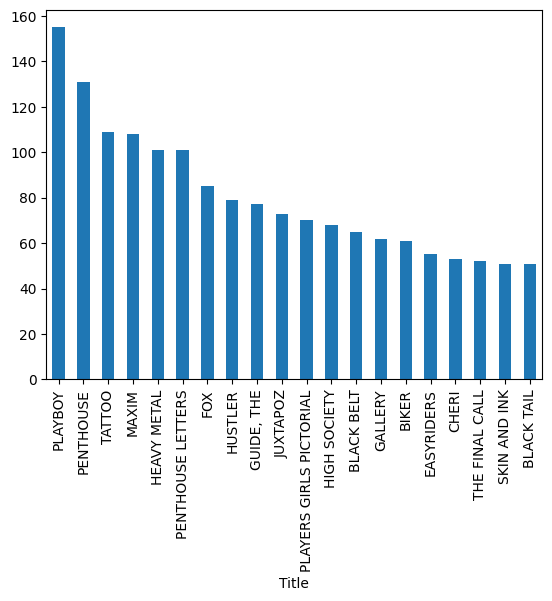

In [11]:
df.groupby('Title').size().sort_values(ascending=False)[:20].plot.bar()

<Axes: xlabel='Author'>

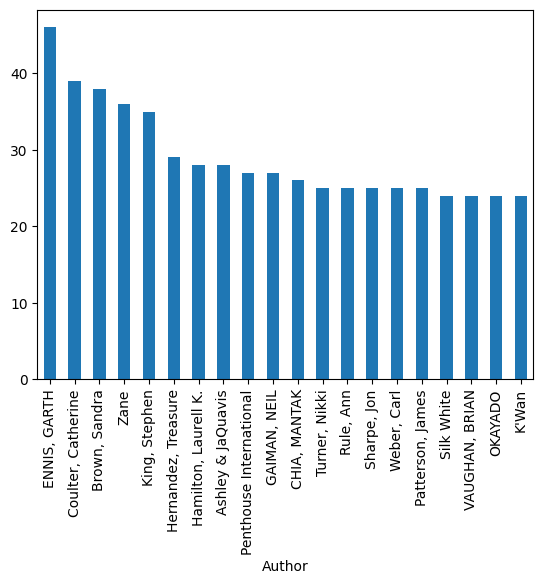

In [12]:
df.groupby('Author').size().sort_values(ascending=False)[:20].plot.bar()

<Axes: xlabel='State'>

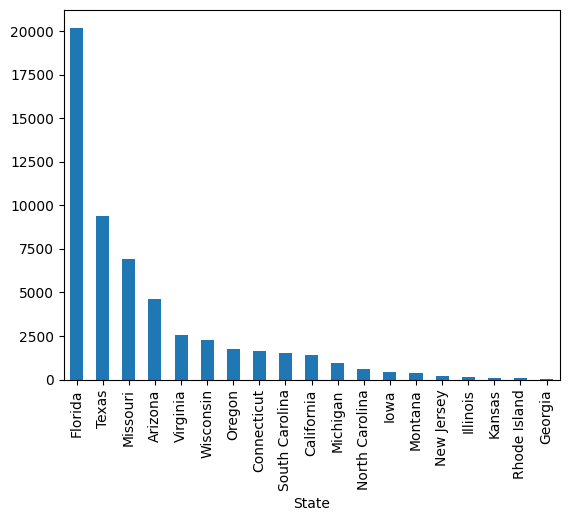

In [20]:
df.groupby('State').size().sort_values(ascending=False)[:20].plot.bar()

In [60]:
import math
def to_period(year, month, day):
    if math.isnan(year) or year<1900:
        return None
    month = 1 if math.isnan(month) else month
    day = 1 if math.isnan(day)  else day 
    return pd.Period(year=year, month=month, day=day, freq='D')
df['DateBan'] = df.apply(lambda x: to_period(x['year'], x['month'], x['day']), axis=1)
df

,Title,Author,date,year,month,day,Description,State,Country,DateBan
0,[ARABIC LANGUAGE CHARACTERS].,NaN,2019-12-18 00:00:00,2019.0,12.0,18.0,NaN,Florida,USA,2019-12-18
1,[ARABIC LANGUAGE CHARACTERS]. TAJWEED QURAN.,NaN,2021-09-09 00:00:00,2021.0,9.0,9.0,NaN,Florida,USA,2021-09-09
2,[KOREAN LANGUAGE CHARACTERS] HOLY SPIRIT LOVE.,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,Florida,USA,2021-02-25
3,[KOREAN LANGUAGE CHARACTERS].,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,Florida,USA,2021-02-25
4,[KOREAN LANGUAGE CHARACTERS].,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,Florida,USA,2021-02-25
...,...,...,...,...,...,...,...,...,...,...
55273,Mentalism Companion,NaN,2021-08-25 00:00:00,2021.0,8.0,25.0,NaN,Rhode Island,USA,2021-08-25
55274,"You Can Read Anyone, Rules of the Game",NaN,2021-09-22 00:00:00,2021.0,9.0,22.0,NaN,Rhode Island,USA,2021-09-22
55275,Sex Slave never judge a Women by her desires,NaN,2021-09-30 00:00:00,2021.0,9.0,30.0,NaN,Rhode Island,USA,2021-09-30
55276,Moorish American Civics Guide,NaN,2021-09-30 00:00:00,2021.0,9.0,30.0,NaN,Rhode Island,USA,2021-09-30


<Axes: xlabel='year'>

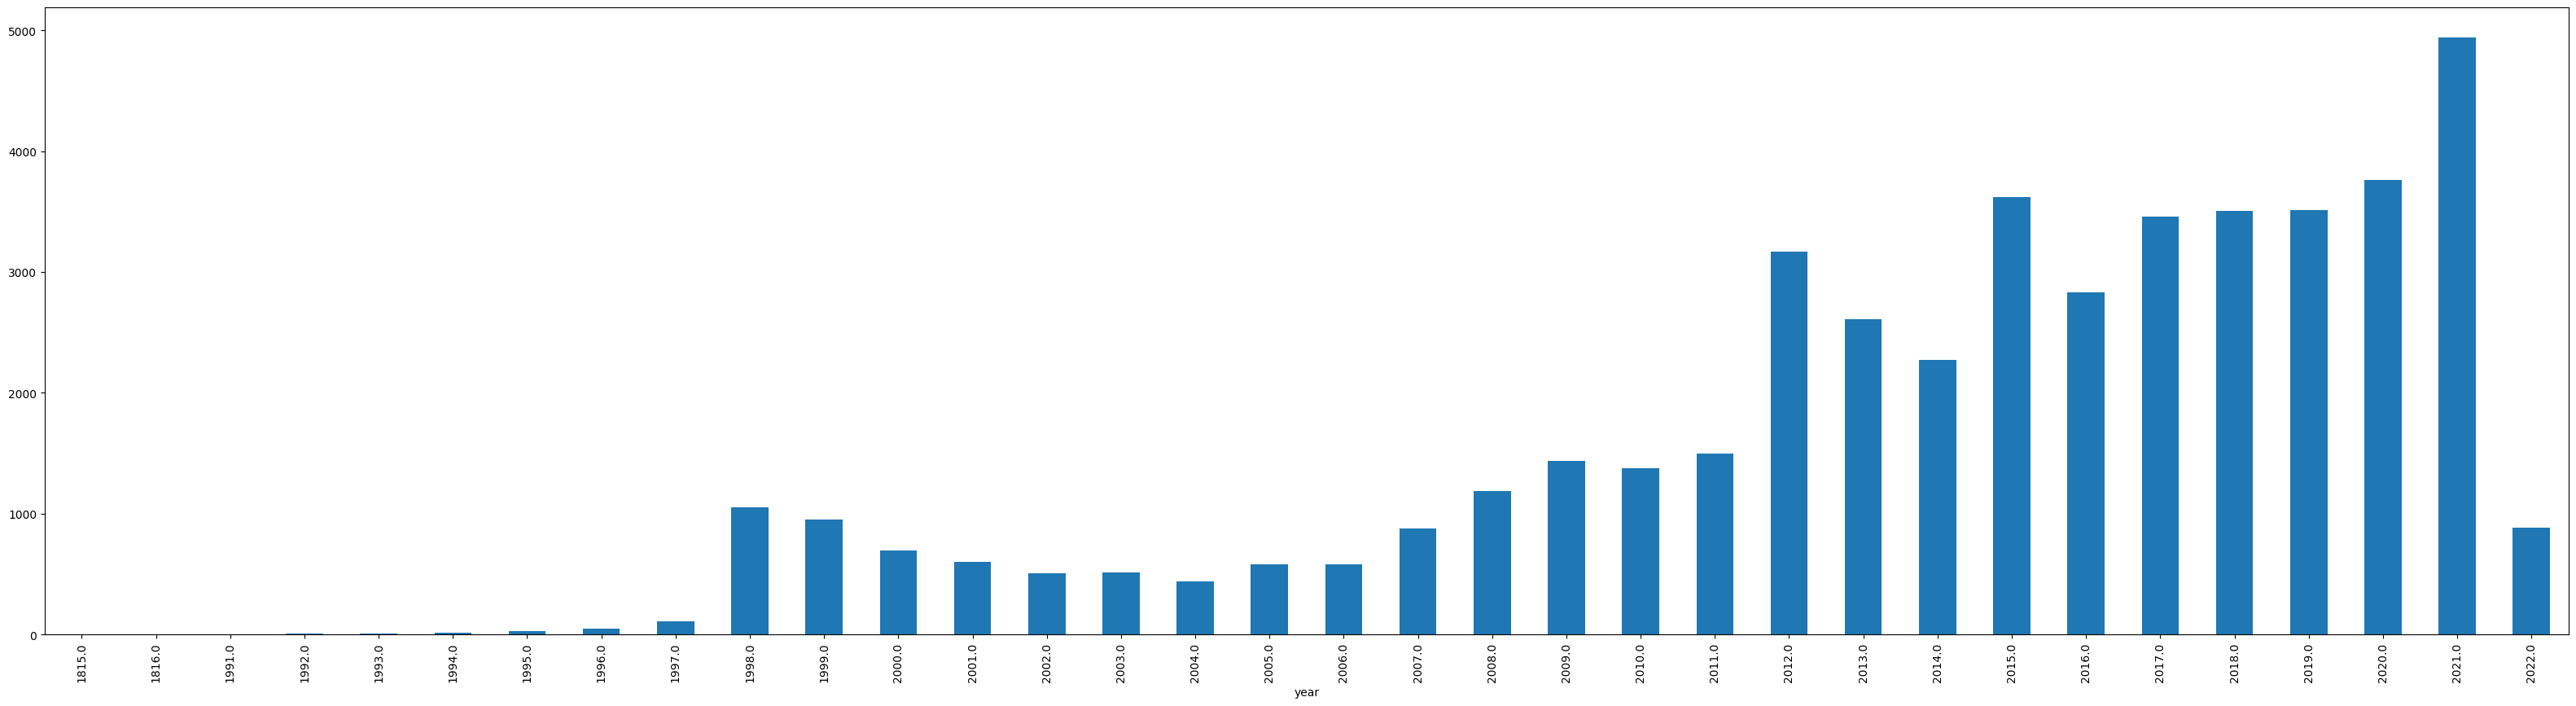

In [61]:
df_clean.groupby(df['year']).size().plot.bar(figsize=(40,10))

In [62]:
df_clean = df.drop(columns=["date", "year", "month", "day"])

In [63]:
df.loc[df['year']<1990, :]

,Title,Author,date,year,month,day,Description,State,Country,DateBan
34628,Kustom Kamera: Greased Up Eye Candy (Korero),Yahya El-Droubie,1816-03-01 00:00:00,1816.0,3.0,1.0,"DOC 309.04 4 (c) 8 a. Photos of naked women, b...",Wisconsin,USA,NaT
35160,Rules of the Game,Neil Strauss,1815-05-01 00:00:00,1815.0,5.0,1.0,DOC 309.05 (2)(b)(2) teaches gambling,Wisconsin,USA,NaT


<Axes: xlabel='DateBan'>

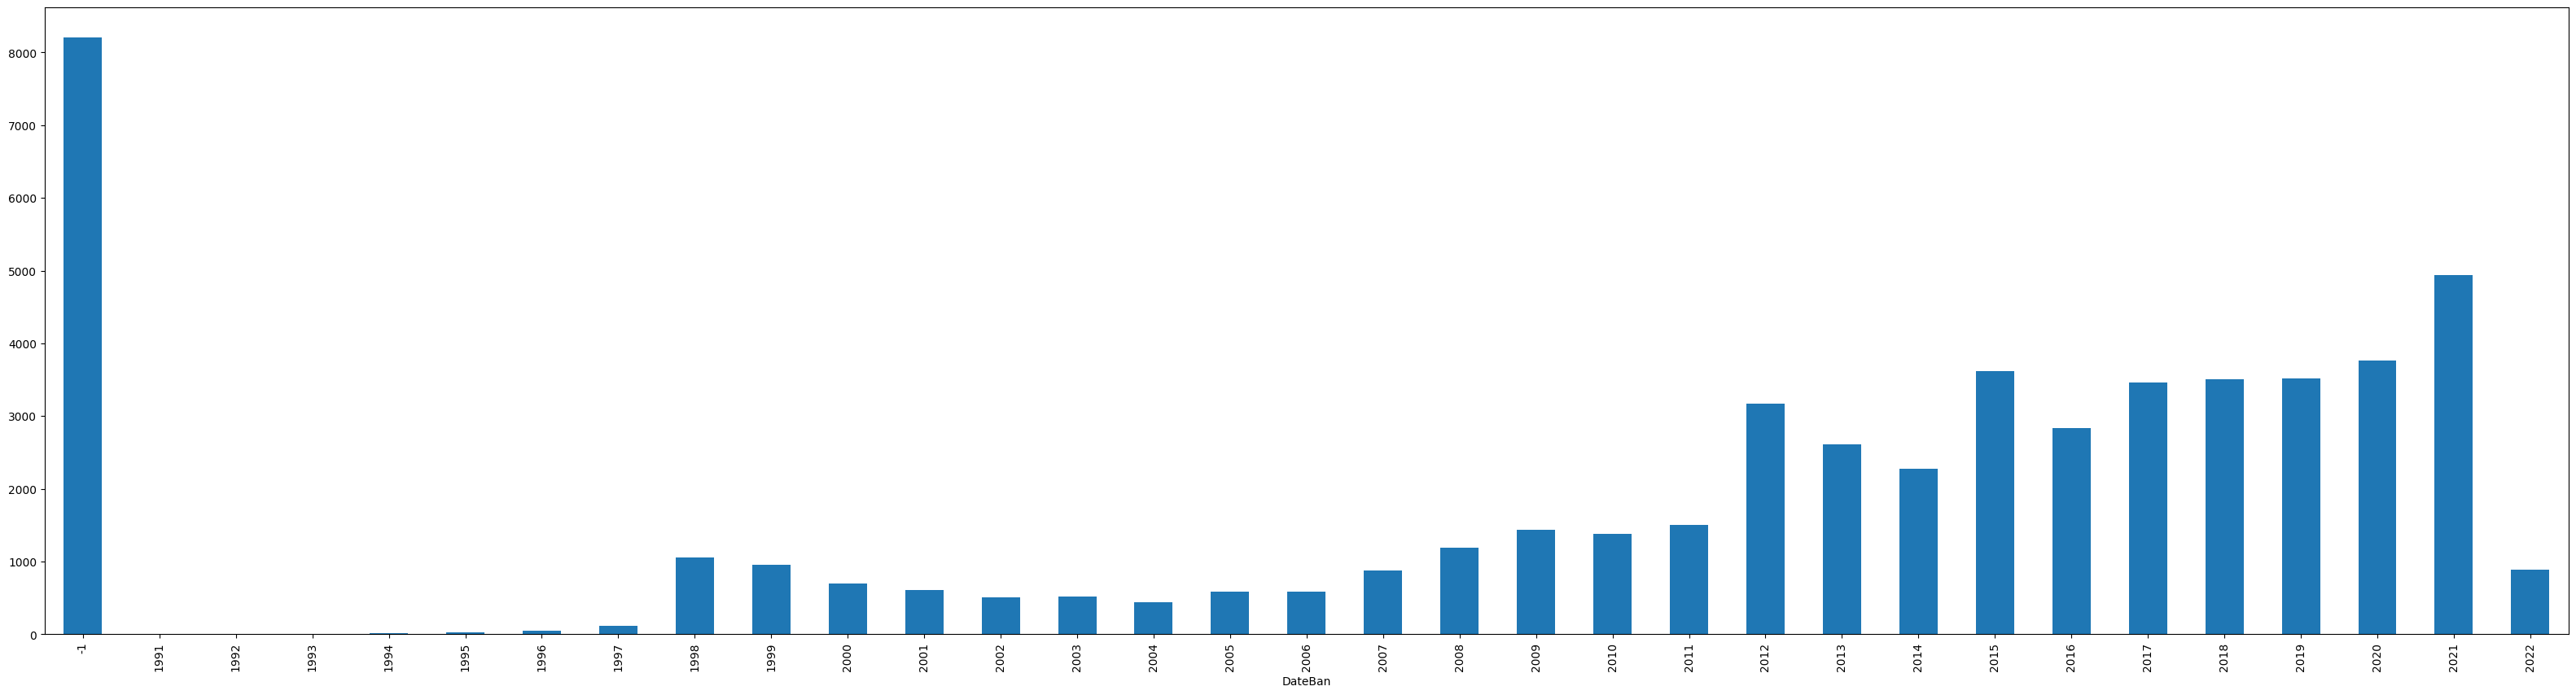

In [64]:
df_clean.groupby([df['DateBan'].dt.year]).size().plot.bar(figsize=(40,10))

In [66]:
df_clean.to_csv('marshall.csv')